# State Space

In [10]:
import numpy as np
# from scipy import signal
import matplotlib.pyplot as plt
import control

State equation:  $ \mathbf{\dot x(t)} = \mathbf{A} \mathbf{x(t)} = \mathbf{B}\mathbf{u(t)} $

Output equation: $ \mathbf{y(t)} = \mathbf{C} \mathbf{x(t)} = \mathbf{D}\mathbf{u(t)} $

Define state matrices

In [11]:
A = np.matrix('0 1; 2 -1')
B = np.matrix("1; 0")
C = np.matrix("1 0")
D = 0
sys = control.ss(A, B, C, D)  # Creating the state space object
eig = np.linalg.eigvals(A)
print(f"The eigenvalues to the system matrix A is: k_1={eig[0]}, and k_2={eig[1]}")

The eigenvalues to the system matrix A is: k_1=1.0, and k_2=-2.0


Desired close loop eigen values: $P=[-2, -1]$

In [12]:
P = [-2, -1]

# Solve for K using pole placement
K = control.place(A, B, P)
print(K)

[[2. 1.]]


In [13]:
# Acl = A - np.matmul(B, K)  # Both methods work
Acl = A -B*K
Ecl = np.linalg.eigvals(Acl)
print(Ecl)

[-1. -2.]


Plotting the open loop step response

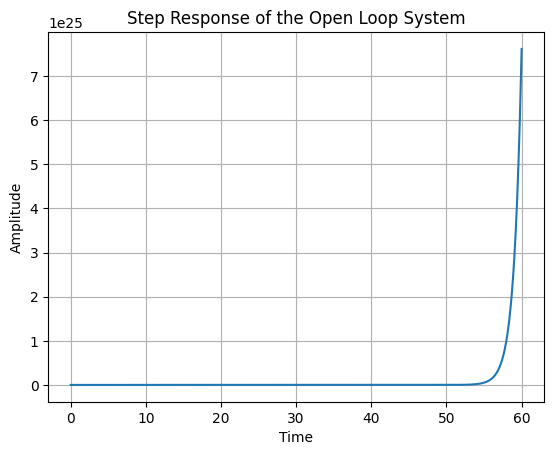

In [14]:
t = np.linspace(0, 60, 1000)  # Time points from 0 to 60 seconds
# t = np.arange(0, 60, 0.1)  # Time points from 0 to 60 seconds with a step size of 0.1

t, y = control.step_response(sys, T=t)

plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step Response of the Open Loop System')
plt.grid(True)
plt.show()

Plotting the closed loop step response

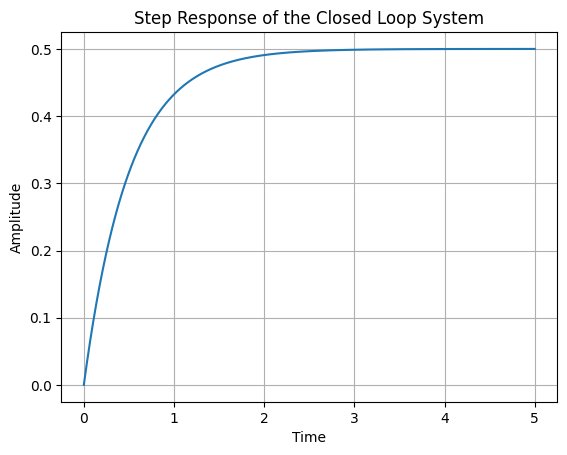

In [15]:
syscl = control.ss(Acl, B, C, D)

t = np.linspace(0, 5, 1000)  # Time points from 0 to 60 seconds
t, y =control.step_response(syscl, T=t)

plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step Response of the Closed Loop System')
plt.grid(True)
plt.show()

Can see that from the step response, that the system is stable. However, instead of reaching the impulse value of 1, the step response only reaches 0.5. In order to solve this the scaling factor is determined.

To find the DC gain (also known as the steady-state gain or the gain at low frequencies) of the closed-loop system, the following is performed. Since it is the steady state gain, the last value of the step response can simply be used. To get a better estimation of the steady-state gain the step response in run for a longer time period.

In [16]:
t = np.linspace(0, 300, 1000)  # Time points from 0 to 60 seconds
t, y = control.step_response(syscl, T=t)
dcgain = y[-1]
print(dcgain)

0.49999999999999983


In [17]:
Kr = 1/dcgain
print(f"Scaling gain Kr={Kr}")

Scaling gain Kr=2.000000000000001


Plotting the scaled closed loop system step response

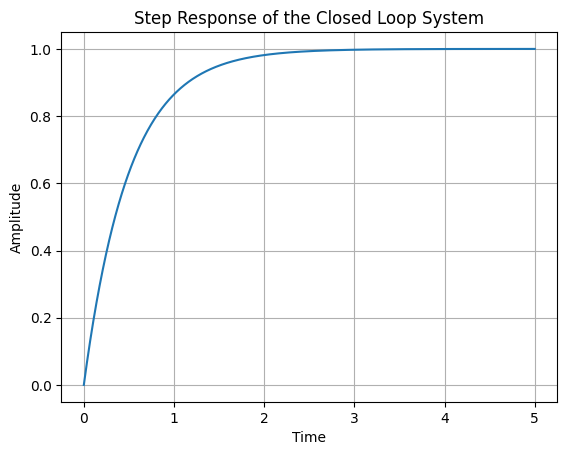

In [18]:
syscl_scaled = control.ss(Acl, B*Kr, C, D)
t = np.linspace(0, 5, 1000)  # Time points from 0 to 60 seconds
t, y = control.step_response(syscl_scaled, T=t)

plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Step Response of the Closed Loop System')
plt.grid(True)
plt.show()